In [1]:
pip install fbprophet

In [1]:
from fbprophet import Prophet
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('Time_series_analysis_and_forecast_DATASET.csv')
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [3]:
df.isnull().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [4]:
df['Time']=df['FullDate'].str[10:]
df['Year']=df['FullDate'].str[:10]
df

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice,Time,Year
0,2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710,00:00:00,2010-09-01
1,2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635,01:00:00,2010-09-01
2,2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565,02:00:00,2010-09-01
3,2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910,03:00:00,2010-09-01
4,2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030,04:00:00,2010-09-01
...,...,...,...,...,...,...,...
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925,19:00:00,2021-02-28
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880,20:00:00,2021-02-28
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060,21:00:00,2021-02-28
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000,22:00:00,2021-02-28


In [5]:
df = df.rename(columns={ "FullDate" : "ds" , "ElecPrice" : "y" })
df.head()

,ds,Tmax,SysLoad,GasPrice,y,Time,Year
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710,00:00:00,2010-09-01
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635,01:00:00,2010-09-01
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565,02:00:00,2010-09-01
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910,03:00:00,2010-09-01
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030,04:00:00,2010-09-01


In [11]:

df_train = df.drop(df.index[46008:])
df_test = df.drop(df.index[-46008:])

X=len(df)

In [12]:
df_train

,ds,Tmax,SysLoad,GasPrice,y,Time,Year
0,2010-09-01 00:00:00,15.8,1688.21500,3.69,23.710,00:00:00,2010-09-01
1,2010-09-01 01:00:00,15.8,1669.19500,3.69,22.635,01:00:00,2010-09-01
2,2010-09-01 02:00:00,15.8,1491.98000,3.69,22.565,02:00:00,2010-09-01
3,2010-09-01 03:00:00,15.8,1330.76000,3.69,18.910,03:00:00,2010-09-01
4,2010-09-01 04:00:00,15.8,1247.94000,3.69,18.030,04:00:00,2010-09-01
...,...,...,...,...,...,...,...
46003,2015-11-30 19:00:00,34.7,378.81625,4.96,39.545,19:00:00,2015-11-30
46004,2015-11-30 20:00:00,34.7,449.82950,4.96,44.285,20:00:00,2015-11-30
46005,2015-11-30 21:00:00,34.7,656.37250,4.96,39.930,21:00:00,2015-11-30
46006,2015-11-30 22:00:00,34.7,864.64020,4.96,42.095,22:00:00,2015-11-30


In [13]:
model = Prophet()
model.fit(df_train)

In [14]:
future = model.make_future_dataframe(periods= 2757 , freq= 'D' )
forecast = model.predict(future)
forecast.head()
forecast[[ 'ds' , 'yhat' , 'yhat_lower' , 'yhat_upper' , 'trend' , 'trend_lower' , 'trend_upper' ]]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2010-09-01 00:00:00,21.177354,-157.560768,212.861711,11.636126,11.636126,11.636126
1,2010-09-01 01:00:00,18.598099,-159.309162,216.616525,11.647141,11.647141,11.647141
2,2010-09-01 02:00:00,11.956173,-165.155358,203.289282,11.658156,11.658156,11.658156
3,2010-09-01 03:00:00,4.455401,-186.603356,182.760856,11.669171,11.669171,11.669171
4,2010-09-01 04:00:00,1.058390,-187.482423,186.574658,11.680186,11.680186,11.680186
...,...,...,...,...,...,...,...
48760,2023-06-14 23:00:00,199.611117,-3645.761117,4014.513957,189.762266,-3630.575070,3995.898046
48761,2023-06-15 23:00:00,195.824054,-3620.499074,4023.650746,189.811063,-3633.173115,3998.781729
48762,2023-06-16 23:00:00,194.327046,-3616.078160,3968.592919,189.859859,-3636.097957,4001.582742
48763,2023-06-17 23:00:00,180.652812,-3660.324127,4053.363648,189.908655,-3639.768365,4004.383756


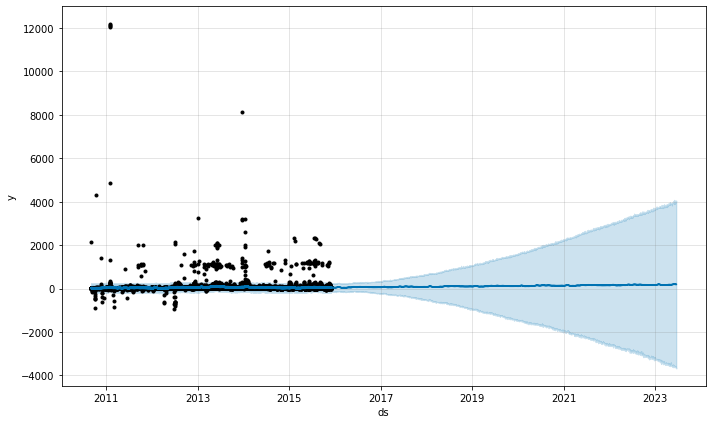

In [15]:
import matplotlib.pyplot as plt
model.plot(forecast)
plt.show()

In [22]:
reg_model = Prophet()
reg_model.add_regressor('Tmax')
reg_model.add_regressor('SysLoad')
reg_model.add_regressor('GasPrice')

reg_model.fit(df_test)

In [57]:
future = reg_model.make_future_dataframe(periods= 2757 , freq= 'D' )
future['Tmax']=df['Tmax']
future['SysLoad']=df['SysLoad']
future['GasPrice']=df['GasPrice']

mt_forecast = reg_model.predict(future)
mt_forecast.head()
mt_forecast[[ 'ds' , 'yhat' , 'yhat_lower' , 'yhat_upper' , 'trend' ]]

,ds,yhat,yhat_lower,yhat_upper,trend
0,2010-09-01 00:00:00,18.167209,-173.765690,195.097451,-16.097013
1,2010-09-01 01:00:00,17.439849,-149.813299,207.819652,-16.077688
2,2010-09-01 02:00:00,6.258112,-177.423848,200.361493,-16.058363
3,2010-09-01 03:00:00,-3.495142,-171.615737,183.843851,-16.039038
4,2010-09-01 04:00:00,-6.594404,-191.571476,179.996850,-16.019712
...,...,...,...,...,...
48760,2023-06-14 23:00:00,116.698080,-3513.540453,3577.405188,91.212920
48761,2023-06-15 23:00:00,110.787009,-3535.608660,3608.220515,91.226318
48762,2023-06-16 23:00:00,111.510652,-3550.008473,3688.402640,91.239717
48763,2023-06-17 23:00:00,98.823478,-3475.704595,3516.547182,91.253116


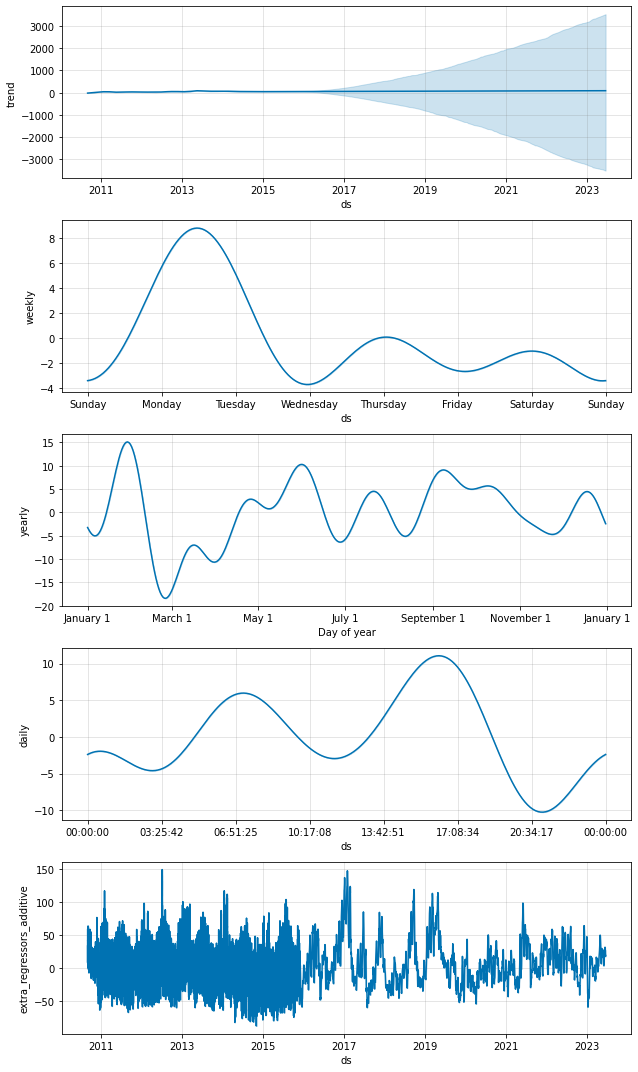

In [58]:
fig = reg_model.plot_components(mt_forecast)

In [41]:
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [49]:
adf_result = adfuller(df[ 'SysLoad' ])
print( f'ADF Statistic: {adf_result[ 0 ]} ' )
print( f'p-value: {adf_result[ 1 ]} ' )
print( f'No. of lags used: {adf_result[ 2 ]} ' )
print( f'No. of observations used : {adf_result[ 3 ]} ' )
print( 'Critical Values:' )
for k, v in adf_result[ 4 ].items():
  print( f' {k} : {v} ' )

ADF Statistic: -18.17067542641451 
p-value %.6f: 2.4474966090684217e-30 
No. of lags used: 67 
No. of observations used : 91948 
Critical Values:
 1% : -3.430421121531399 
 5% : -2.861571434572286 
 10% : -2.566786731528145 


In [50]:
adf_result = adfuller(df[ 'GasPrice' ])
print( f'ADF Statistic: {adf_result[ 0 ]} ' )
print( f'p-value: {adf_result[ 1 ]} ' )
print( f'No. of lags used: {adf_result[ 2 ]} ' )
print( f'No. of observations used : {adf_result[ 3 ]} ' )
print( 'Critical Values:' )
for k, v in adf_result[ 4 ].items():
  print( f' {k} : {v} ' )

ADF Statistic: -6.793388065452667 
p-value: 2.3337605343636574e-09 
No. of lags used: 48 
No. of observations used : 91967 
Critical Values:
 1% : -3.430421106837576 
 5% : -2.86157142807793 
 10% : -2.566786728071412 
